<a href="https://colab.research.google.com/github/anirudhsony22/bigdata_temp/blob/main/MIS584_ML_Classification_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIS584_ML_Classification_PySpark.ipynb

## Practice on Supervised Classification Methods
In this notebook, we will practice the use of various methods discussed in classes for supervised classification tasks. Specifically, we will be using the popular `scikit-learn` python package to apply the following classification methods:
* k-nearest neighbor
* naive bayes
* logistic regression
* support vector machine
* decision tree

We will also employ useful functions provided by the `scikit-learn` package for evaluating the performance of these methods. The dataset we will be working on is the heart disease dataset from the UCI machine learning repository. You can find the detailed descriptions on the data set through this [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). Essentially, the heart disease dataset includes various input variables on patients' attributes (e.g., age, gender, cholestoral, etc.) and the target variable is whether a patient is diagnosed with heart disease or not. The variables of the dataset and their definitions are listed below:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* xang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num (target variable): diagnosis of heart disease (angiographic disease status); 0: < 50% diameter narrowing; 1: > 50% diameter narrowing


### Download and Read Dataset

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

import pandas as pd
from urllib.request import urlretrieve

# download the dataset
urlretrieve('https://drive.google.com/uc?export=download&id=19W0wK1VB1jMjFpxvG3o0m2OxHf-F2cN3',
            'cleveland.csv')

# read the dataset
data_pd = pd.read_csv('cleveland.csv')

# show the dataset
## list the shape of the dataset
print('Shape of the dataset: ')
print(data_pd.shape)
print()

## display the first 10 rows
print('First 10 rows of the dataset: ')
print(data_pd.head(n=10))
print()

Shape of the dataset: 
(303, 14)

First 10 rows of the dataset: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

  ca thal  num  
0  0    6    0  
1  3    3

In [ ]:
!pip install pyspark

In [ ]:
#######################################################################
### PySpark

from pyspark.sql import SparkSession
import requests

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Cleveland Data Analysis") \
    .getOrCreate()

# Define the URL and local path
url = 'https://drive.google.com/uc?export=download&id=19W0wK1VB1jMjFpxvG3o0m2OxHf-F2cN3'
local_path = 'cleveland.csv'

# Download the dataset
response = requests.get(url)
with open(local_path, 'wb') as file:
    file.write(response.content)

# Read the dataset
data = spark.read.csv(local_path, header=True, inferSchema=True)
print("Type of data: ", type(data))

# Show the shape of the dataset
print('Shape of the dataset: ')
print((data.count(), len(data.columns)))
print()

# Display the first 10 rows
print('First 10 rows of the dataset: ')
data.show(10)
print()

# # Stop the Spark session
# spark.stop()

Type of data:  <class 'pyspark.sql.dataframe.DataFrame'>
Shape of the dataset: 
(303, 14)

First 10 rows of the dataset: 
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|num|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---+
| 63|  1|  1|     145| 233|  1|      2|    150|    0|    2.3|    3|  0|   6|  0|
| 67|  1|  4|     160| 286|  0|      2|    108|    1|    1.5|    2|  3|   3|  1|
| 67|  1|  4|     120| 229|  0|      2|    129|    1|    2.6|    2|  2|   7|  1|
| 37|  1|  3|     130| 250|  0|      0|    187|    0|    3.5|    3|  0|   3|  0|
| 41|  0|  2|     130| 204|  0|      2|    172|    0|    1.4|    1|  0|   3|  0|
| 56|  1|  2|     120| 236|  0|      0|    178|    0|    0.8|    1|  0|   3|  0|
| 62|  0|  4|     140| 268|  0|      2|    160|    0|    3.6|    3|  2|   3|  1|
| 57|  0|  4|     120| 354|  0|      0|    163|    1|    0.6|    1| 

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

## summarize the dataset
print('Summary of the dataset:')
print(data_pd.describe())
print()

# examine missing values (labeled w/ "?")
print('Number of missing observations for each attribute:')
print((data_pd == '?').sum(axis=0))
print()

Summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.458746  
std   

In [ ]:
#######################################################################
### PySpark

from pyspark.sql.functions import col, when, count

# Summarize the dataset
print('Summary of the dataset:')
data.describe().show()
print()

# Examine missing values (labeled with "?")
# Count occurrences of "?" in each column
print('Number of missing observations for each attribute:')
missing_values = data.select([count(when(col(c) == "?", c)).alias(c) for c in data.columns])
missing_values.show()
print()

Summary of the dataset:
+-------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|              age|                sex|                cp|          trestbps|              chol|               fbs|           restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|                num|
+-------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|  count|              303|                303|               303|               303|               303|               303|               303|

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

## replace missing ca with value 0
data_pd.loc[data_pd['ca'] == '?', 'ca'] = 0       # ca: number of major vessels (0-3) colored by flourosopy

## replace missing thal with value 3
data_pd.loc[data_pd['thal'] == '?', 'thal'] = 3   # thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## examine number of missing values again
print('Number of missing observations for each attribute after imputation:')
print((data_pd == '?').sum(axis=0))
print()

# create training data and labels
X_pd = data_pd.drop(columns='num')
y_pd = data_pd['num']

Number of missing observations for each attribute after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64



In [ ]:
#######################################################################
### PySpark

# Replace missing 'ca' values with 0
data = data.withColumn('ca', when(col('ca') == "?", 0).otherwise(col('ca').cast('integer')))

# Replace missing 'thal' values with 3
data = data.withColumn('thal', when(col('thal') == "?", 3).otherwise(col('thal').cast('integer')))

# Examine number of missing values again
print('Number of missing observations for each attribute after imputation:')
missing_values_post_imputation = data.select([count(when(col(c) == "?", c)).alias(c) for c in data.columns])
missing_values_post_imputation.show()
print()

# Create training data and labels
X = data.drop('num')
y = data.select('num')

print('Training data (features):')
X.show(5)  # Show a few rows of the features
print()

print('Labels:')
y.show(5)  # Show a few rows of the labels
print()


Number of missing observations for each attribute after imputation:
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|num|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---+
|  0|  0|  0|       0|   0|  0|      0|      0|    0|      0|    0|  0|   0|  0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---+


Training data (features):
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+
| 63|  1|  1|     145| 233|  1|      2|    150|    0|    2.3|    3|  0|   6|
| 67|  1|  4|     160| 286|  0|      2|    108|    1|    1.5|    2|  3|   3|
| 67|  1|  4|     120| 229|  0|      2|    129|    1|    2.6|    2|  2|   7|
| 37|  1|  3|     130| 250|  0|      

### Method 1: K-Nearest Neighbor

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)       # K = 5
knn.fit(X_train, y_train)                                # fit the model
knn_pred = knn.predict(X_test)                       # make predictions
knn_score = knn.predict_proba(X_test)                # get prediction scores

# print the predicted labels
print('Predicted labels:')
print(knn_pred)
print()

# print the prediction scores
print('Predicted scores:')
print(knn_score[:20])
print()

Predicted labels:
[0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1]

Predicted scores:
[[1.         0.        ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]]



In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,\
    precision_score, f1_score, roc_auc_score

# calculate prediction performance
## confusion matrix; Note: the definition is different from the one in our slides
## scikit-learn's definition: C_{i, j}: number of observations from group i and predicgted to be in group j
## see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html for more details

print('Confusion Matrix:')
knn_conf_mat = confusion_matrix(y_test, knn_pred)
print(knn_conf_mat)
print()

## accuracy
knn_acc = accuracy_score(y_test, knn_pred)
print('Prediction accuracy: {:.4f}'.format(knn_acc))

## recall
knn_recall = recall_score(y_test, knn_pred)
print('Prediction recall: {:.4f}'.format(knn_recall))

## precision
knn_precision = precision_score(y_test, knn_pred)
print('Prediction precision: {:.4f}'.format(knn_precision))

## F1 score
knn_f1 = f1_score(y_test, knn_pred)
print('Prediction F1: {:.4f}'.format(knn_f1))

## AUC-ROC
knn_auc = roc_auc_score(y_test, knn_score[:, 1]) # provide predicted scores for label 1 (instead of predicted label).
print('AUC-ROC : {:.4f}'.format(knn_auc))
print()

Confusion Matrix:
[[34 15]
 [17 25]]

Prediction accuracy: 0.6484
Prediction recall: 0.5952
Prediction precision: 0.6250
Prediction F1: 0.6098
AUC-ROC : 0.6936



In [ ]:
#######################################################################
### PySpark

# No KNN algorithm provided in Spark.

# Spark algorithms for Classification and Regression:
# https://spark.apache.org/docs/latest/ml-classification-regression.html

# KNN is notoriously hard to parallelize in Spark because KNN is a "lazy learner" and the model itself is the entire dataset.
# Most single machine implementations rely on KD Trees or Ball Trees to store the entire dataset in the RAM of a single machine.
# I would recommend using scikit-learn's single machine implementation with a Simple Random Sample of the dataset if you really want to use KNN.
# https://community.databricks.com/t5/data-engineering/knn-classifier-on-spark/td-p/29328

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import KNNClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

ImportError: cannot import name 'KNNClassifier' from 'pyspark.ml.classification' (/usr/local/lib/python3.10/dist-packages/pyspark/ml/classification.py)

In [ ]:
# quick check problem 1:
# change the number of neighbors used in knn and see how it affects the performance



### Method 2: Naive Bayes

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.naive_bayes import GaussianNB

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)                                   # fit the model
gnb_pred = gnb.predict(X_test)                       # make predictions
gnb_score = gnb.predict_proba(X_test)                # get prediction scores

## accuracy
gnb_acc = accuracy_score(y_test, gnb_pred)
print('Prediction accuracy: {:.4f}'.format(gnb_acc))

## recall
gnb_recall = recall_score(y_test, gnb_pred)
print('Prediction recall: {:.4f}'.format(gnb_recall))

## precision
gnb_precision = precision_score(y_test, gnb_pred)
print('Prediction precision: {:.4f}'.format(gnb_precision))

## F1 score
gnb_f1 = f1_score(y_test, gnb_pred)
print('Prediction F1: {:.4f}'.format(gnb_f1))

## AUC-ROC
gnb_auc = roc_auc_score(y_test, gnb_score[:, 1])
print('AUC-ROC : {:.4f}'.format(gnb_auc))
print()

Prediction accuracy: 0.8681
Prediction recall: 0.8571
Prediction precision: 0.8571
Prediction F1: 0.8571
AUC-ROC : 0.9203



In [ ]:
#######################################################################
### PySpark

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Assemble the features into a single vector column
# Uses a VectorAssembler to combine feature columns into a single vector column.
assembler = VectorAssembler(inputCols=[c for c in data.columns if c != 'num'], outputCol='features')
data = assembler.transform(data)

# Prepare the DataFrame for modeling
data = data.select(col('features'), col('num').alias('label'))

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize and fit the Naive Bayes model
nb = NaiveBayes(featuresCol='features', labelCol='label')
nb_model = nb.fit(train_data)

# Make predictions on the test data
nb_predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(nb_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))

recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(nb_predictions)
print('Prediction recall: {:.4f}'.format(recall))

precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(nb_predictions)
print('Prediction precision: {:.4f}'.format(precision))

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = f1_evaluator.evaluate(nb_predictions)
print('Prediction F1: {:.4f}'.format(f1_score))

# Evaluate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='probability', metricName='areaUnderROC')
auc_roc = binary_evaluator.evaluate(nb_predictions)
print('AUC-ROC: {:.4f}'.format(auc_roc))


nb_model = nb.fit(train_data)

# Make predictions on the test data
nb_predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(nb_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))


# Prediction accuracy: 0.7722

Prediction accuracy: 0.7722
Prediction recall: 0.7722
Prediction precision: 0.7728
Prediction F1: 0.7677
AUC-ROC: 0.8867


**Key Differences:**
Whereas scikit-learn uses explicit methods like predict and predict_proba,

*  PySpark's DataFrame API handles predictions and probabilities in a unified call with transformations on a DataFrame.

*  PySpark evaluates models with evaluators like MulticlassClassificationEvaluator and BinaryClassificationEvaluator instead of scikit-learn's evaluation metrics functions.


### Method 3: Logistic Regression

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.linear_model import LogisticRegression

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)                                    # fit the model
log_clf_pred = log_clf.predict(X_test)                    # make predictions
log_clf_score = log_clf.predict_proba(X_test)             # get prediction scores

## accuracy
log_clf_acc = accuracy_score(y_test, log_clf_pred)
print('Prediction accuracy: {:.4f}'.format(log_clf_acc))

## recall
log_clf_recall = recall_score(y_test, log_clf_pred)
print('Prediction recall: {:.4f}'.format(log_clf_recall))

## precision
log_clf_precision = precision_score(y_test, log_clf_pred)
print('Prediction precision: {:.4f}'.format(log_clf_precision))

## F1 score
log_clf_f1 = f1_score(y_test, log_clf_pred)
print('Prediction F1: {:.4f}'.format(log_clf_f1))

## AUC-ROC
log_clf_auc = roc_auc_score(y_test, log_clf_score[:, 1])
print('AUC-ROC : {:.4f}'.format(log_clf_auc))
print()

Prediction accuracy: 0.8681
Prediction recall: 0.8333
Prediction precision: 0.8750
Prediction F1: 0.8537
AUC-ROC : 0.9174



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

# you can use the code below to extract logistic regression's features and their
# coefficients; specifically, feature_names_in_ will return all the input features,
# and coef_ will return all the features' estimated coefficients

log_clf_coef = pd.DataFrame({
    'Feature Name': log_clf.feature_names_in_,
    'Coefficient': log_clf.coef_[0] # scikit-learn doesn't provide std.dev. or p-value; we need a separate package for it (e.g., linear model package).
})
print(log_clf_coef)

# what are the potential factors that can increase the risk of heart diseases?

   Feature Name  Coefficient
0           age    -0.037168
1           sex     0.780693
2            cp     0.401279
3      trestbps     0.011668
4          chol     0.001931
5           fbs    -0.066884
6       restecg     0.204589
7       thalach    -0.029041
8         exang     0.747291
9       oldpeak     0.469556
10        slope    -0.012121
11           ca     1.160545
12         thal     0.209386


In [ ]:
#######################################################################
### PySpark

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(featuresCol='features', labelCol='label')
log_reg_model = log_reg.fit(train_data)

# Make predictions on the test data
log_reg_predictions = log_reg_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(log_reg_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))

recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(log_reg_predictions)
print('Prediction recall: {:.4f}'.format(recall))

precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(log_reg_predictions)
print('Prediction precision: {:.4f}'.format(precision))

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = f1_evaluator.evaluate(log_reg_predictions)
print('Prediction F1: {:.4f}'.format(f1_score))

# Evaluate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='probability', metricName='areaUnderROC')
auc_roc = binary_evaluator.evaluate(log_reg_predictions)
print('AUC-ROC: {:.4f}'.format(auc_roc))

Prediction accuracy: 0.8228
Prediction recall: 0.8228
Prediction precision: 0.8232
Prediction F1: 0.8208
AUC-ROC: 0.8972


In [ ]:
#######################################################################
### PySpark

# Extract the coefficients
coefficients = log_reg_model.coefficients
intercept = log_reg_model.intercept
print(f"Intercept: {intercept}")

# Combine feature names and coefficients into a DataFrame
# feature_cols = log_reg_model.feature_names_in_
## AttributeError: 'LogisticRegressionModel' object has no attribute 'feature_names_in_'

import pandas as pd
log_reg_coef = pd.DataFrame({
    # 'Feature Name': feature_cols,
    'Coefficient': coefficients.tolist()  # convert Spark Vector to a list and then Pandas DataFrame
})

print(log_reg_coef)

Intercept: -5.240188536616869
    Coefficient
0     -0.044803
1      1.159590
2      0.786472
3      0.030997
4      0.003269
5     -0.325568
6      0.264148
7     -0.026873
8      1.172947
9      0.150227
10     0.428087
11     1.404804
12     0.233879


### Method 4: Support Vector Machine

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.svm import LinearSVC

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

svm = LinearSVC()
svm.fit(X_train, y_train)                                # fit the model
svm_pred = svm.predict(X_test)                    # make predictions

## accuracy
svm_acc = accuracy_score(y_test, svm_pred)
print('Prediction accuracy: {:.4f}'.format(svm_acc))

## recall
svm_recall = recall_score(y_test, svm_pred)
print('Prediction recall: {:.4f}'.format(svm_recall))

## precision
svm_precision = precision_score(y_test, svm_pred)
print('Prediction precision: {:.4f}'.format(svm_precision))

## F1 score
svm_f1 = f1_score(y_test, svm_pred)
print('Prediction F1: {:.4f}'.format(svm_f1))

Prediction accuracy: 0.8791
Prediction recall: 0.8571
Prediction precision: 0.8780
Prediction F1: 0.8675


In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

# by default, scikit-learn will run the svm algorithm for 1000 iterations
# which might lead to less desirable performance (e.g., warning message of not converging)
# you can change the maximum number of iterations by specifying a number of the max_iter parameter

# quick check 2: change the max_iter to a larger number, fit the model, and make predictions
# print out the performance and compare the performance with previous results
# what did you find?

# svm = LinearSVC(max_iter='?')             # TODO: change '?' to a number larger than 1000
svm = LinearSVC(max_iter=5000)              # TODO: change '?' to a number larger than 1000

In [ ]:
#######################################################################
### PySpark

# pyspark.ml.classification.LinearSV
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LinearSVC.html

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize and fit the LinearSVC model
svm = LinearSVC(featuresCol='features', labelCol='label')
# svm = LinearSVC(featuresCol='features', labelCol='label', maxIter=5000) # with maxIter=5000
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(svm_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))

recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(svm_predictions)
print('Prediction recall: {:.4f}'.format(recall))

precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(svm_predictions)
print('Prediction precision: {:.4f}'.format(precision))

f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = f1_evaluator.evaluate(svm_predictions)
print('Prediction F1: {:.4f}'.format(f1_score))


Prediction accuracy: 0.8608
Prediction recall: 0.8608
Prediction precision: 0.8639
Prediction F1: 0.8586


### Method 5: Decision Tree

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,\
    precision_score, f1_score, roc_auc_score

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

dt_clf = DecisionTreeClassifier(max_depth=3) # max_depth=3
dt_clf.fit(X_train, y_train)                                # fit the model
dt_clf_pred = dt_clf.predict(X_test)                 # make predictions
dt_clf_score = dt_clf.predict_proba(X_test)          # get prediction scores

print(dt_clf_pred)

print(dt_clf_score)

[0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0]
[[0.75       0.25      ]
 [0.08196721 0.91803279]
 [0.86138614 0.13861386]
 [0.08196721 0.91803279]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.08196721 0.91803279]
 [0.66666667 0.33333333]
 [0.86138614 0.13861386]
 [0.75       0.25      ]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.86138614 0.13861386]
 [0.08196721 0.91803279]
 [0.86138614 0.13861386]
 [0.08196721 0.91803279]
 [0.86138614 0.13861386]
 [0.66666667 0.33333333]
 [0.08196721 0.91803279]
 [0.2        0.8       ]
 [0.86138614 0.13861386]
 [0.08196721 0.91803279]
 [0.3        0.7       ]
 [0.3        0.7       ]
 [0.08196721 0

In [ ]:
######################################################################
### Python Pandas and Scikit-learn

# Alternative threshold than 0.5?
dt_clf_score[:, 1] > 0.9

array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False])

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,\
    precision_score, f1_score, roc_auc_score

# we first split all data into test set and training & validation sets combined
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.3, random_state=1)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)                                # fit the model
dt_clf_pred = dt_clf.predict(X_test)                 # make predictions
dt_clf_score = dt_clf.predict_proba(X_test)          # get prediction scores


## accuracy
dt_clf_acc = accuracy_score(y_test, dt_clf_pred)
print('Prediction accuracy: {:.4f}'.format(dt_clf_acc))

## recall
dt_clf_recall = recall_score(y_test, dt_clf_pred)
print('Prediction recall: {:.4f}'.format(dt_clf_recall))

## precision
dt_clf_precision = precision_score(y_test, dt_clf_pred)
print('Prediction precision: {:.4f}'.format(dt_clf_precision))

## F1 score
dt_clf_f1 = f1_score(y_test, dt_clf_pred)
print('Prediction F1: {:.4f}'.format(dt_clf_f1))

# auc-roc
dt_clf_auc = roc_auc_score(y_test, dt_clf_score[:, 1])
print('AUC-ROC: {:.4f}'.format(dt_clf_auc))

Prediction accuracy: 0.8132
Prediction recall: 0.8333
Prediction precision: 0.7778
Prediction F1: 0.8046
AUC-ROC: 0.8146


In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

# by default, scikit-learn will expand a decision tree until all leaves are pure
# this will cause sever "overfitting" issue as we will discuss in the future
# try specifying the 'max_depth' parameter to be 3 so that the tree will only have a depth of 3

dt_clf = DecisionTreeClassifier(max_depth=3)    # TODO: change '?' to 3
dt_clf.fit(X_train, y_train)                                # fit the model
dt_clf_pred = dt_clf.predict(X_test)                 # make predictions
dt_clf_score = dt_clf.predict_proba(X_test)          # get prediction scores

## accuracy
dt_clf_acc = accuracy_score(y_test, dt_clf_pred)
print('Prediction accuracy: {:.4f}'.format(dt_clf_acc))

## recall
dt_clf_recall = recall_score(y_test, dt_clf_pred)
print('Prediction recall: {:.4f}'.format(dt_clf_recall))

## precision
dt_clf_precision = precision_score(y_test, dt_clf_pred)
print('Prediction precision: {:.4f}'.format(dt_clf_precision))

## F1 score
dt_clf_f1 = f1_score(y_test, dt_clf_pred)
print('Prediction F1: {:.4f}'.format(dt_clf_f1))

# auc-roc
dt_clf_auc = roc_auc_score(y_test, dt_clf_score[:, 1])
print('AUC-ROC: {:.4f}'.format(dt_clf_auc))

Prediction accuracy: 0.7802
Prediction recall: 0.6667
Prediction precision: 0.8235
Prediction F1: 0.7368
AUC-ROC: 0.7891


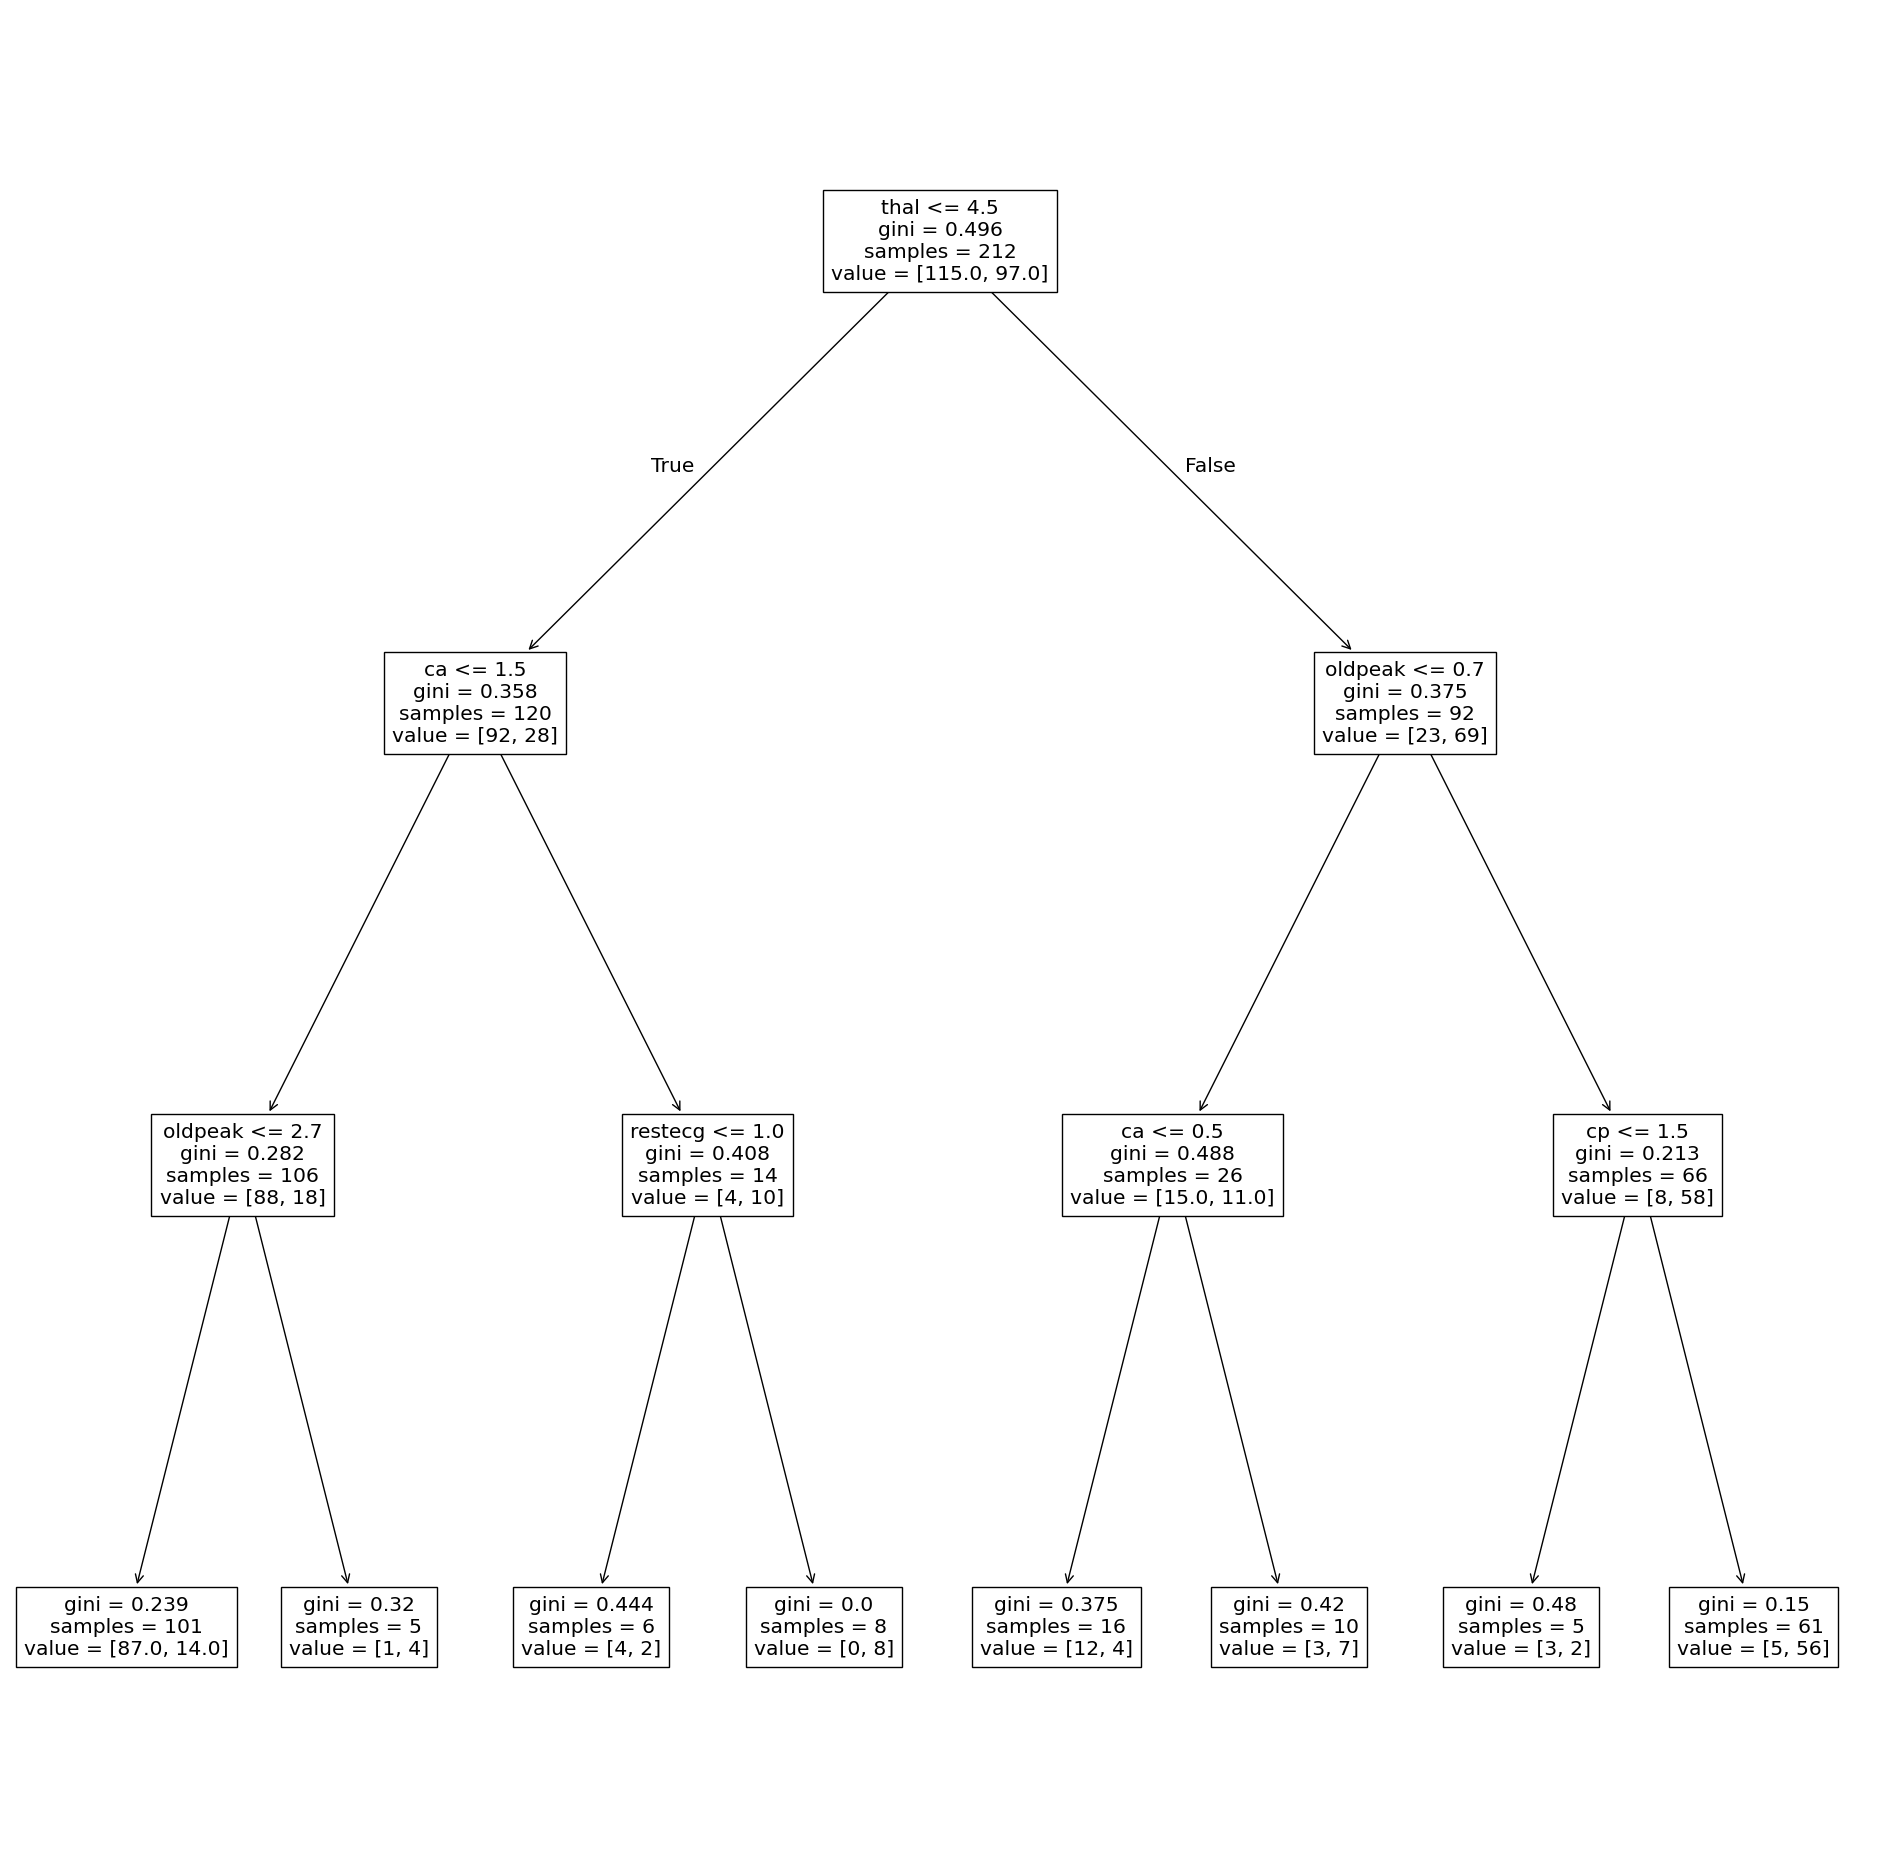

In [ ]:
#######################################################################
### Python Pandas and Scikit-learn

# in this module, we plot the decision tree using the plot_tree function
# we also changed the default figure size and export the figure to an external pdf file
# using the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 24))
plot_tree(dt_clf, feature_names=X_pd.columns)
plt.savefig('decision_tree_graph.pdf')

# how can we interpret the results from the decision tree?

**Gini Index**: a measure that indicates how homogeneous each subset is.

The Gini Index or Impurity measures the probability for a random instance being misclassified when chosen randomly. **The lower the Gini Index, the lower the likelihood of misclassification** [see here for details](https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c).

This [link](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575#:~:text=Decision%20trees%20are%20a%20rule,off%20between%20interpretability%20and%20performance.) provide more details on how decision tree splits branches.

In [ ]:
#######################################################################
### PySpark

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import pandas as pd

# # Assemble the features into a single vector column
# feature_cols = [c for c in data.columns if c != 'num']
# assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
# data = assembler.transform(data)

# # Prepare the DataFrame for modeling
# data = data.select(col('features'), col('num').alias('label'))

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize and fit the Decision Tree model with default maxDepth=5
dt_clf = DecisionTreeClassifier(featuresCol='features', labelCol='label')
dt_clf_model = dt_clf.fit(train_data)

# Make predictions on the test data
dt_clf_predictions = dt_clf_model.transform(test_data)

# Extract predicted labels and probabilities
dt_clf_pred = dt_clf_predictions.select('prediction').collect()
dt_clf_score = dt_clf_predictions.select('probability').collect()

# Convert to Pandas DataFrame for easier handling (optional)
dt_clf_pred_df = pd.DataFrame(dt_clf_pred, columns=['Prediction'])
dt_clf_score_df = pd.DataFrame(dt_clf_score, columns=['Probability'])

print(dt_clf_pred_df)
print(dt_clf_score_df)


# Evaluate the model
# Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(dt_clf_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))

# Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(dt_clf_predictions)
print('Prediction recall: {:.4f}'.format(recall))

# Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(dt_clf_predictions)
print('Prediction precision: {:.4f}'.format(precision))

# F1 Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = f1_evaluator.evaluate(dt_clf_predictions)
print('Prediction F1: {:.4f}'.format(f1_score))

# AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='probability', metricName='areaUnderROC')
auc_roc = binary_evaluator.evaluate(dt_clf_predictions)
print('AUC-ROC: {:.4f}'.format(auc_roc))


    Prediction
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
..         ...
74         0.0
75         1.0
76         1.0
77         0.0
78         0.0

[79 rows x 1 columns]
                                  Probability
0                                  [1.0, 0.0]
1                                  [1.0, 0.0]
2   [0.9230769230769231, 0.07692307692307693]
3                                  [1.0, 0.0]
4    [0.8490566037735849, 0.1509433962264151]
..                                        ...
74   [0.8490566037735849, 0.1509433962264151]
75                                 [0.0, 1.0]
76                                 [0.0, 1.0]
77                                 [1.0, 0.0]
78  [0.9230769230769231, 0.07692307692307693]

[79 rows x 1 columns]
Prediction accuracy: 0.7595
Prediction recall: 0.7595
Prediction precision: 0.7579
Prediction F1: 0.7576
AUC-ROC: 0.8175


In [ ]:
#######################################################################
### PySpark

# # by default, Spark DecisionTreeClassifier has maxDepth value of 5.
# # The higher number of maxDepth may cause "overfitting" issue as we will discuss in the future.
# # try specifying the 'maxDepth' parameter to be 3 so that the tree will only have a depth of 3
# dt_clf = DecisionTreeClassifier(maxDepth=3)    # TODO: change '?' to 3

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import pandas as pd

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initialize and fit the Decision Tree model with maxDepth=3
dt_clf = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxDepth=3)
dt_clf_model = dt_clf.fit(train_data)

# Make predictions on the test data
dt_clf_predictions = dt_clf_model.transform(test_data)

# Evaluate the model
# Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(dt_clf_predictions)
print('Prediction accuracy: {:.4f}'.format(accuracy))

# Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
recall = recall_evaluator.evaluate(dt_clf_predictions)
print('Prediction recall: {:.4f}'.format(recall))

# Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(dt_clf_predictions)
print('Prediction precision: {:.4f}'.format(precision))

# F1 Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = f1_evaluator.evaluate(dt_clf_predictions)
print('Prediction F1: {:.4f}'.format(f1_score))

# AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='probability', metricName='areaUnderROC')
auc_roc = binary_evaluator.evaluate(dt_clf_predictions)
print('AUC-ROC: {:.4f}'.format(auc_roc))

Prediction accuracy: 0.7848
Prediction recall: 0.7848
Prediction precision: 0.7849
Prediction F1: 0.7815
AUC-ROC: 0.7684


In [ ]:
#######################################################################
### PySpark

# Feature Importance
# Analyze the feature importance of the decision tree model to understand the key factors contributing to the classification task.

feature_importance = dt_clf_model.featureImportances.toArray()

# Show feature importance
for i, column in enumerate(assembler.getInputCols()):
    print(f"Feature '{column}': {feature_importance[i]:.3f}")

Feature 'age': 0.000
Feature 'sex': 0.062
Feature 'cp': 0.654
Feature 'trestbps': 0.000
Feature 'chol': 0.000
Feature 'fbs': 0.000
Feature 'restecg': 0.000
Feature 'thalach': 0.083
Feature 'exang': 0.000
Feature 'oldpeak': 0.000
Feature 'slope': 0.000
Feature 'ca': 0.109
Feature 'thal': 0.092


In [ ]:
#######################################################################
### PySpark

# Unfortunately, Spark MLlib does not support getting the tree structure directly like scikit-learn.
# But you can convert the PySpark DataFrame to Pandas and use scikit-learn's capabilities if necessary.

In [ ]:
### In-Class Activity:
# Select one algorithm and experiment with random split size
# (e.g., 50, 40, 30, 20, 10% of entire data as test data)
# and share your opinion on why 20-30% test data become rule-of-thumb?




In [ ]:
# don't forget to stop your spark context!
sc.stop()